In [1]:
# Downloading data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

c:\Users\lazyh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\lazyh\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


Moved data to local folder for easier access

In [2]:
# The 4 essential libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing and viewing data
df = pd.read_csv('Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Preprocessing

In [4]:
# Checking for null values and amount of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null Values

In [6]:
# checking for numeric data and their properties
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Renaming col
df.rename(columns={'tenure':'MonthStayed'}, inplace=True)

# Exploration

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# removing customerID because it is useless
df.drop('customerID', axis=1, inplace=True)

Checking the distribution of the categorical values

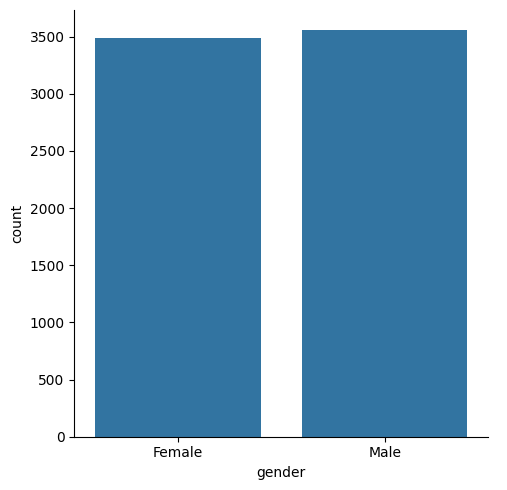

In [10]:
sns.catplot(x='gender', kind='count', data=df)

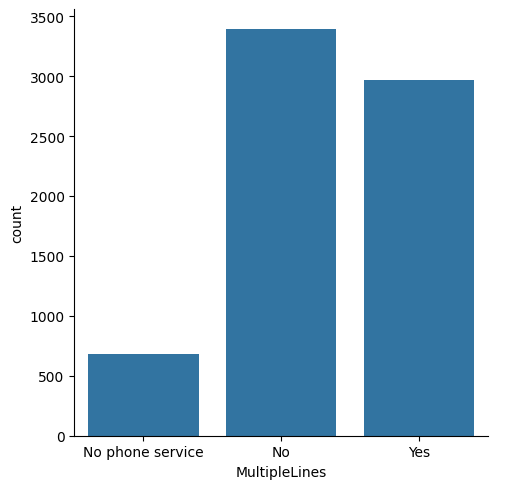

In [11]:
sns.catplot(x='MultipleLines', kind='count', data=df)

In [12]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MonthStayed',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

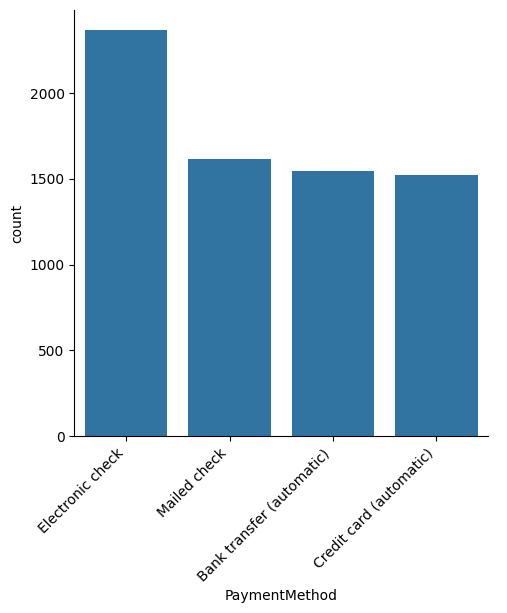

In [13]:
sns.catplot(x='PaymentMethod', kind='count', data=df).set_xticklabels(rotation=45, horizontalalignment='right')

All category for each column are about the same amount, only outlier is in Payment method

### Dealing with Non_Numeric Data

There is already phone service and internet service columns so no_internet data on other columns is redundant

In [14]:
# Making function to replace redundant data
def replace_phone(x):
    if x == 'No phone service':
        n = 'No'
        return n.capitalize()
    return x

In [15]:
df['MultipleLines'] = df['MultipleLines'].apply(replace_phone)

In [16]:
# Checking if it worked
df['MultipleLines']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042     No
Name: MultipleLines, Length: 7043, dtype: object

In [17]:
# Bringing up all the cols with 'no internet service'
df[df['OnlineSecurity'] == 'No internet service']

,gender,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
16,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,Female,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7030,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


removing redundancy

In [18]:
def replace_phone(x):
    if x == 'No internet service':
        n = 'No'
        return n.capitalize()
    return x

In [19]:
for col, data in df.items():
    if col != 'InternetService':
        df[col] = df[col].apply(lambda x: replace_phone(x) if x == 'No internet service' else x)

In [20]:
df[df=='No internet service'].isnull().sum()

gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
MonthStayed         7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

### Dealing with Yes, No Entries

In [21]:
# imporing LabelEncoder for non-categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [22]:
# imporing OrdinalEncoder for categorical data
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['No','Yes']])

In [23]:
# all the cols with yes/no values
yes_no = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 
        'PaperlessBilling', 'Churn']
df[yes_no]

for col in df[yes_no]:
    df[[col]] = oe.fit_transform(df[[col]])
df[yes_no]

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
7039,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
7040,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## Dealing with other Categorical Data

In [24]:
df

,gender,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1.0,0.0,1,0.0,0.0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
1,Male,0,0.0,0.0,34,1.0,0.0,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0.0,Mailed check,56.95,1889.5,0.0
2,Male,0,0.0,0.0,2,1.0,0.0,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0
3,Male,0,0.0,0.0,45,0.0,0.0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
4,Female,0,0.0,0.0,2,1.0,0.0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1.0,1.0,24,1.0,1.0,DSL,1.0,0.0,1.0,1.0,1.0,1.0,One year,1.0,Mailed check,84.80,1990.5,0.0
7039,Female,0,1.0,1.0,72,1.0,1.0,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,One year,1.0,Credit card (automatic),103.20,7362.9,0.0
7040,Female,0,1.0,1.0,11,0.0,0.0,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,29.60,346.45,0.0
7041,Male,1,1.0,0.0,4,1.0,1.0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Mailed check,74.40,306.6,1.0


In [ ]:
# Used LabelEncoder because it gender is nominal data
df['gender'] = le.fit_transform(df[['gender']])
df['gender']

c:\Users\lazyh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int32

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1.0,0.0,1,0.0,0.0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
1,1,0,0.0,0.0,34,1.0,0.0,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0.0,Mailed check,56.95,1889.5,0.0
2,1,0,0.0,0.0,2,1.0,0.0,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0
3,1,0,0.0,0.0,45,0.0,0.0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
4,0,0,0.0,0.0,2,1.0,0.0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1.0,1.0,24,1.0,1.0,DSL,1.0,0.0,1.0,1.0,1.0,1.0,One year,1.0,Mailed check,84.80,1990.5,0.0
7039,0,0,1.0,1.0,72,1.0,1.0,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,One year,1.0,Credit card (automatic),103.20,7362.9,0.0
7040,0,0,1.0,1.0,11,0.0,0.0,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,29.60,346.45,0.0
7041,1,1,1.0,0.0,4,1.0,1.0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Mailed check,74.40,306.6,1.0


In [27]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

No true order for these values either

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['InternetService'] = le.fit_transform(df['InternetService'])

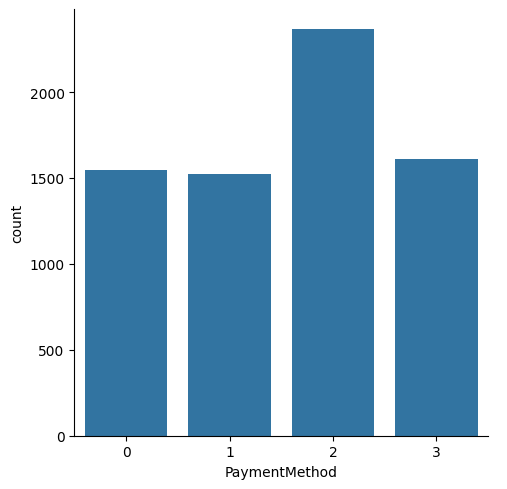

In [31]:
sns.catplot(x='PaymentMethod', kind='count', data=df)

nominal data

In [30]:
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

In [32]:
df

,gender,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1.0,0.0,1,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,2,29.85,29.85,0.0
1,1,0,0.0,0.0,34,1.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,One year,0.0,3,56.95,1889.5,0.0
2,1,0,0.0,0.0,2,1.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,3,53.85,108.15,1.0
3,1,0,0.0,0.0,45,0.0,0.0,0,1.0,0.0,1.0,1.0,0.0,0.0,One year,0.0,0,42.30,1840.75,0.0
4,0,0,0.0,0.0,2,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,2,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1.0,1.0,24,1.0,1.0,0,1.0,0.0,1.0,1.0,1.0,1.0,One year,1.0,3,84.80,1990.5,0.0
7039,0,0,1.0,1.0,72,1.0,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,One year,1.0,1,103.20,7362.9,0.0
7040,0,0,1.0,1.0,11,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,2,29.60,346.45,0.0
7041,1,1,1.0,0.0,4,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,3,74.40,306.6,1.0


In [33]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

their is an order based on time

In [34]:
oe = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])

df['Contract'] = oe.fit_transform(df[['Contract']])

In [35]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner             float64
Dependents          float64
MonthStayed           int64
PhoneService        float64
MultipleLines       float64
InternetService       int32
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn               float64
dtype: object

In [36]:
df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

their is an empty string

In [37]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [38]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MonthStayed          0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

11 empty string

In [40]:
df.dropna(inplace=True)

In [41]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner             float64
Dependents          float64
MonthStayed           int64
PhoneService        float64
MultipleLines       float64
InternetService       int32
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

# EDA

Splitting data because Analyzing the whole data will cause overfitting

In [42]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [44]:
# making train data
tr = x_train.join(y_train)

In [45]:
tr

,gender,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4499,0,0,0.0,1.0,12,1.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,78.30,909.25,1.0
1933,1,0,0.0,0.0,20,1.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3,19.70,415.90,0.0
4668,0,0,0.0,1.0,2,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,61.20,125.95,0.0
5681,0,1,1.0,0.0,34,1.0,0.0,0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0,64.20,2106.30,0.0
3610,0,0,0.0,0.0,12,1.0,1.0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,100.15,1164.30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,1,0,0.0,1.0,23,1.0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,54.15,1312.45,0.0
3451,1,1,1.0,0.0,65,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,70.95,4555.20,0.0
4135,0,0,1.0,1.0,36,1.0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1,92.90,3379.25,0.0
4249,0,0,1.0,1.0,10,1.0,0.0,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,3,65.90,660.05,0.0


<Axes: >

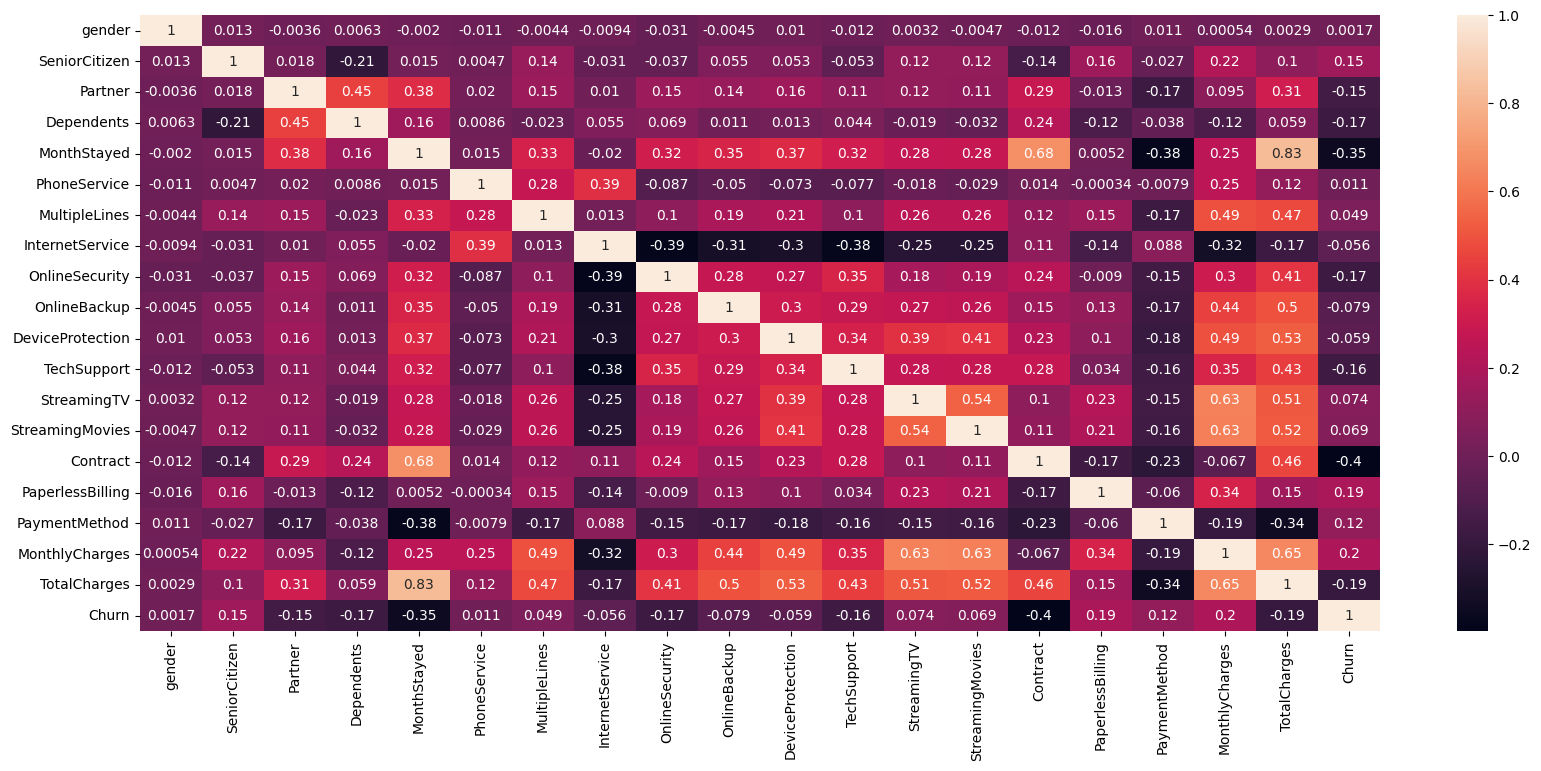

In [46]:
plt.figure(figsize=(20, 8))
sns.heatmap(tr.corr(), annot=True)

Gender has very low correlation

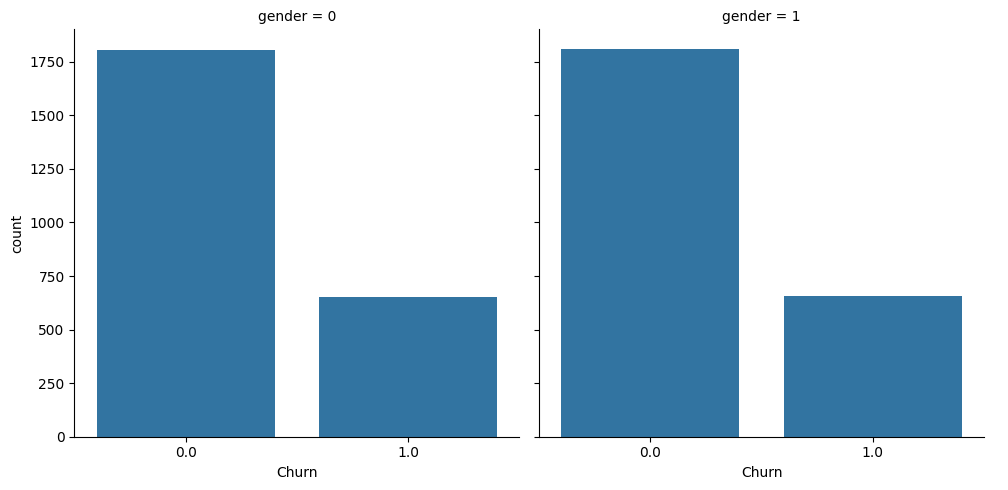

In [48]:
sns.catplot(x='Churn', col='gender', kind='count', data=tr)

In [49]:
# No difference so removing gender from the Data frame
tr.drop(['gender'], axis=1, inplace=True)

<Axes: >

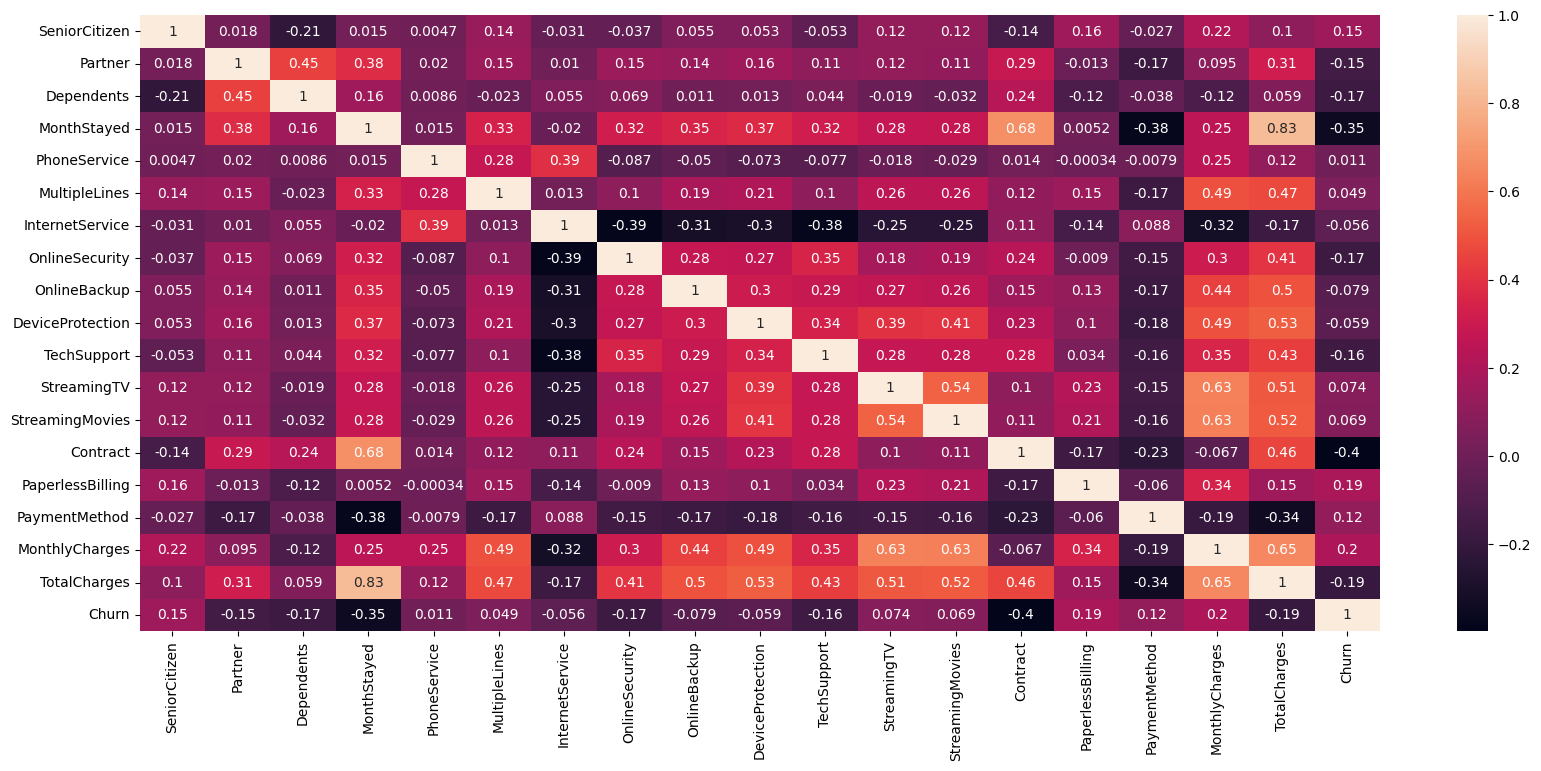

In [50]:
plt.figure(figsize=(20, 8))
sns.heatmap(tr.corr(), annot=True)

In [51]:
# Importing necessary models
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# checking how good the models are before feature engineering, and param tuning
models = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'params':{
            
        }
    },
     'SVM':{
        'model':svm.SVC(),
        'params':{
            
        }
    }, 
     'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'params':{
            
        }
        
    },
    'XGBoost': {
        'model': XGBClassifier(objective='binary:logistic'),
        'params': {
            'learning_rate': [0.01, 0.1, 0.5],
            'n_estimators': [10, 50, 100]
        }
    }
}

In [53]:
scores = []
for model, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'])
    clf.fit(tr.drop('Churn', axis=1), tr['Churn'])

    scores.append({
        'model':clf.best_estimator_,
        'param':clf.best_params_,
        'score':clf.best_score_
                   })

In [54]:
scores

[{'model': RandomForestClassifier(), 'param': {}, 'score': 0.797846147497008},
 {'model': SVC(), 'param': {}, 'score': 0.7342544674177707},
 {'model': KNeighborsClassifier(), 'param': {}, 'score': 0.7663596219718543},
 {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, random_state=None, 

Not too good

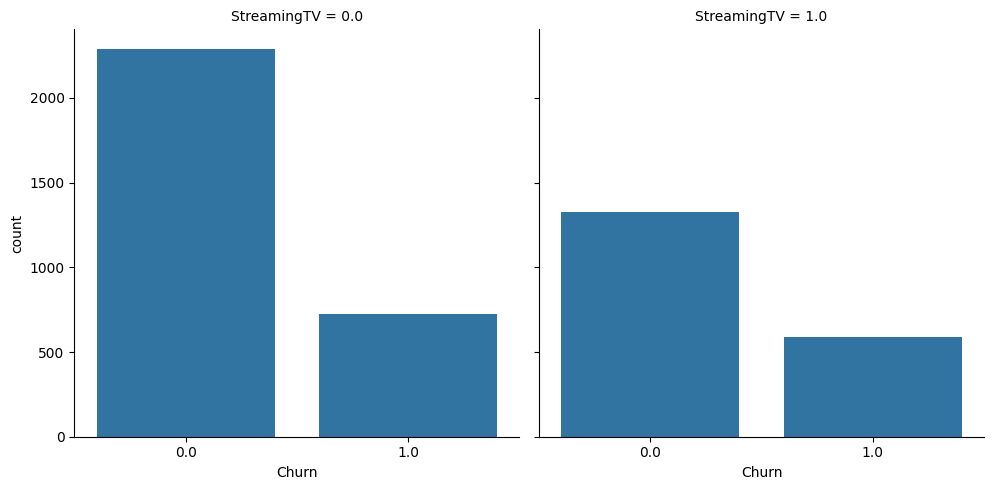

In [55]:
sns.catplot(x='Churn', col='StreamingTV', kind='count', data=tr)

In [56]:
tr['StreamingTV'].value_counts()

StreamingTV
0.0    3012
1.0    1910
Name: count, dtype: int64

More people that don't stream don't churn, but that could be because their are just more people that don't stream

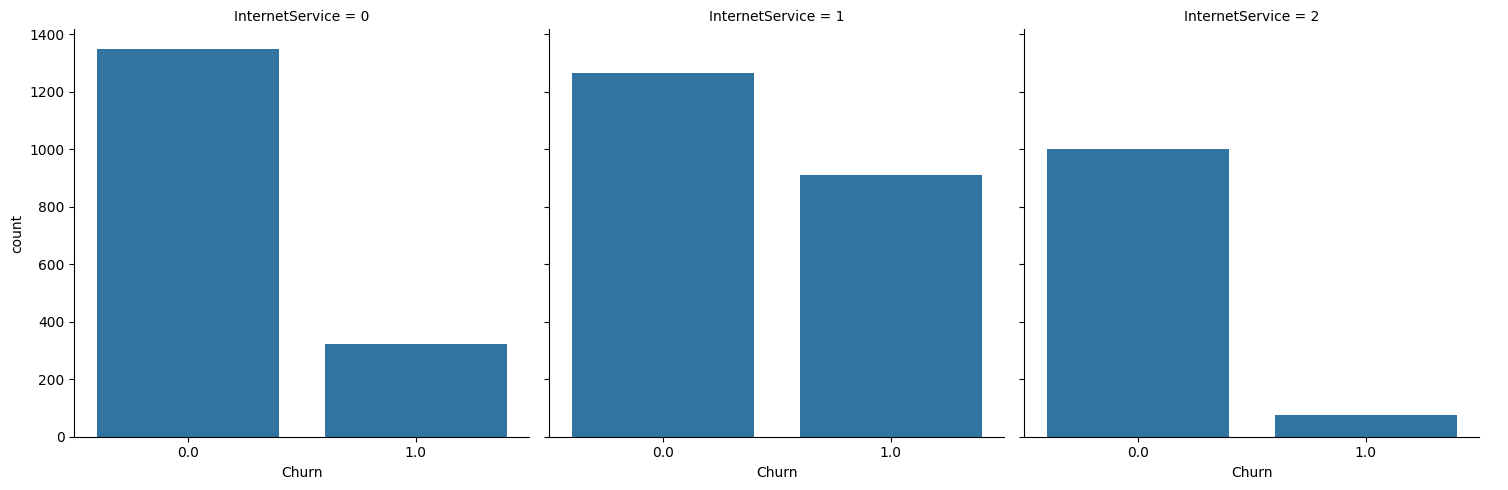

In [57]:
sns.catplot(x='Churn', col='InternetService', kind='count', data=tr)

In [58]:
tr['InternetService'].value_counts()

InternetService
1    2176
0    1672
2    1074
Name: count, dtype: int64

Similar to streamingTV

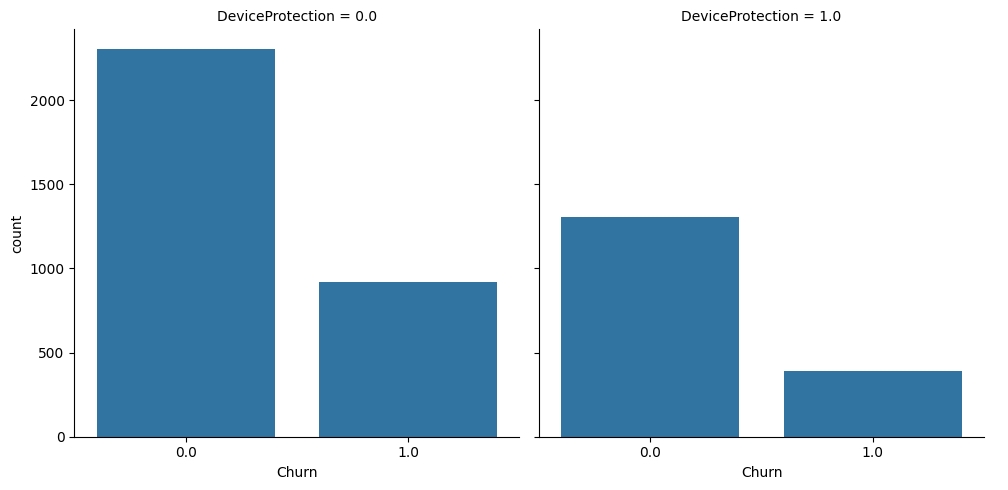

In [59]:
sns.catplot(x='Churn', col='DeviceProtection', kind='count', data=tr)

In [60]:
tr['DeviceProtection'].value_counts()

DeviceProtection
0.0    3224
1.0    1698
Name: count, dtype: int64

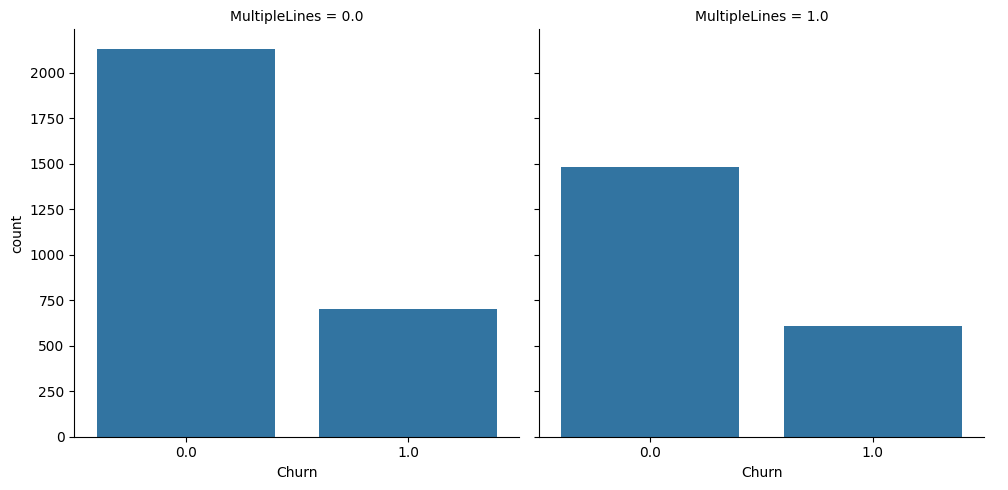

In [61]:
sns.catplot(x='Churn', col='MultipleLines', kind='count', data=tr)

In [62]:
tr['MultipleLines'].value_counts()

MultipleLines
0.0    2830
1.0    2092
Name: count, dtype: int64

<Axes: >

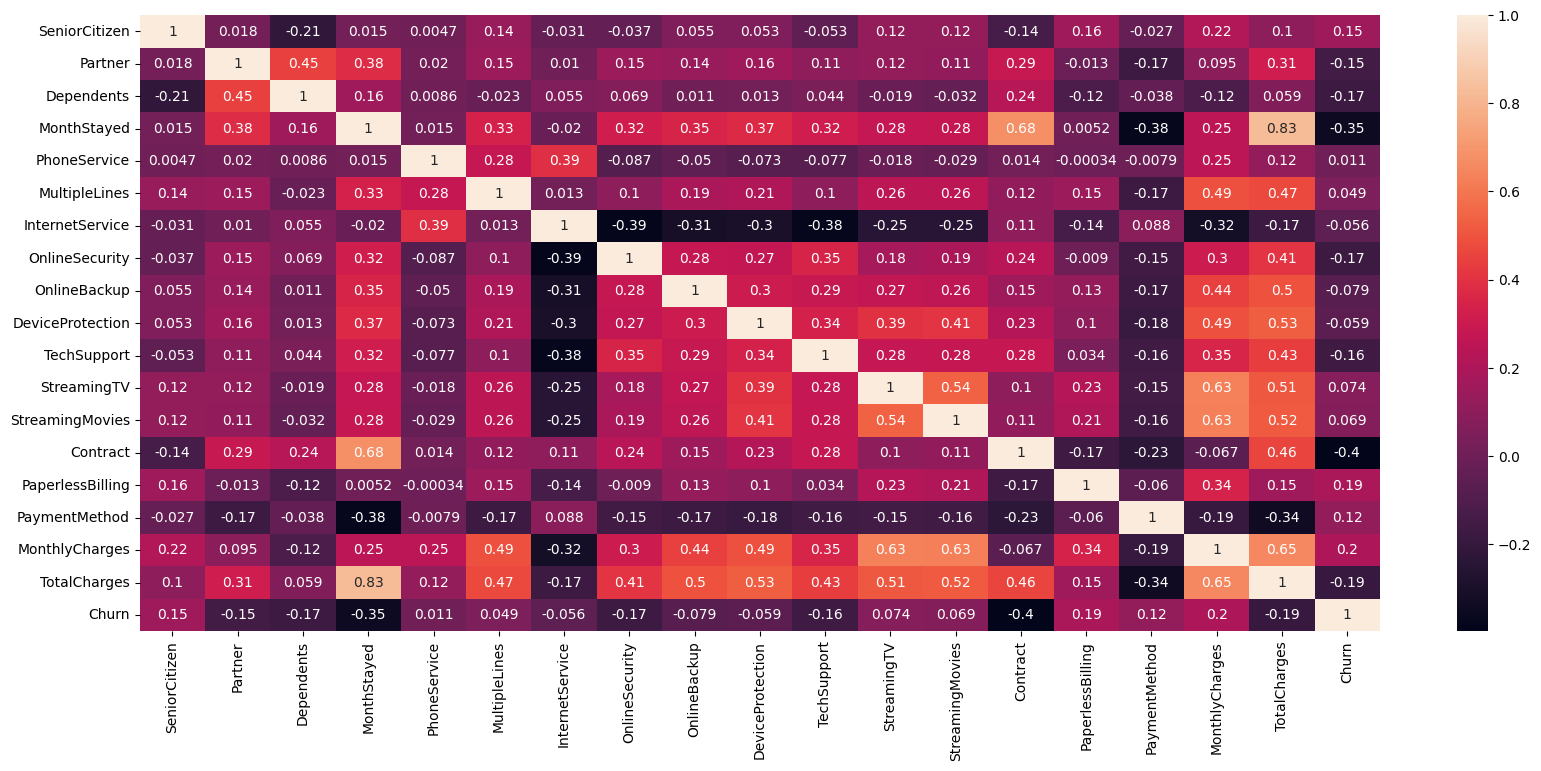

In [63]:
plt.figure(figsize=(20, 8))
sns.heatmap(tr.corr(), annot=True)

Reducing features to avoid overfitting

In [ ]:
# As shown in the graphs and correlations heatmap most have little affect on churning
tr.drop(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies'], axis=1, inplace=True)

In [64]:
tr

,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4499,0,0.0,1.0,12,1.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,78.30,909.25,1.0
1933,0,0.0,0.0,20,1.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3,19.70,415.90,0.0
4668,0,0.0,1.0,2,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,61.20,125.95,0.0
5681,1,1.0,0.0,34,1.0,0.0,0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0,64.20,2106.30,0.0
3610,0,0.0,0.0,12,1.0,1.0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,100.15,1164.30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,0,0.0,1.0,23,1.0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,54.15,1312.45,0.0
3451,1,1.0,0.0,65,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,70.95,4555.20,0.0
4135,0,1.0,1.0,36,1.0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1,92.90,3379.25,0.0
4249,0,1.0,1.0,10,1.0,0.0,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,3,65.90,660.05,0.0


<Axes: >

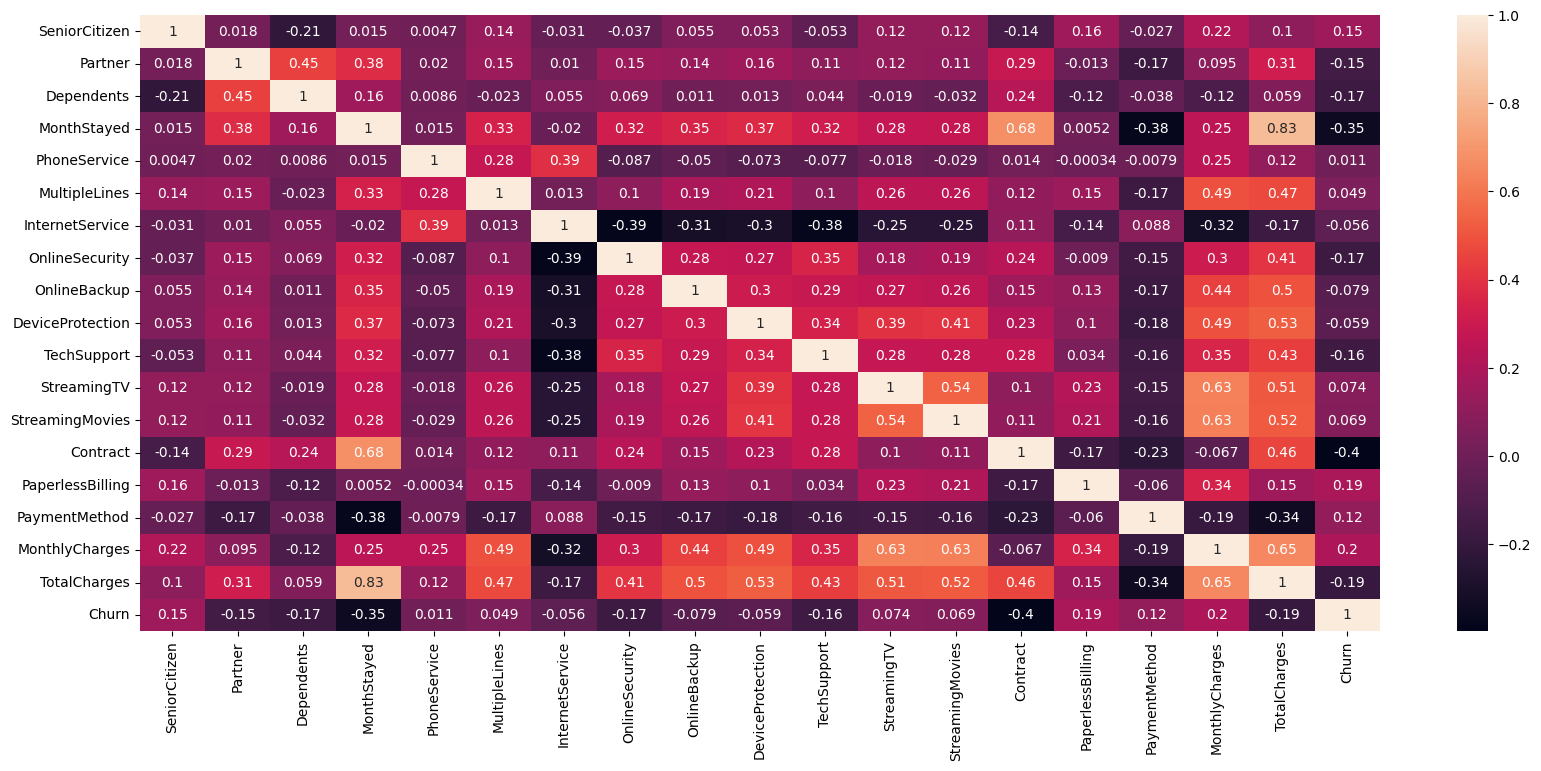

In [65]:
plt.figure(figsize=(20,8))
sns.heatmap(tr.corr(), annot=True)

In [ ]:
models = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[5, 10, 20, 50]
        }
    },
     'SVM':{
        'model':svm.SVC(),
        'params':{
            'kernel':['rbf', 'linear']
        }
    }, 
     'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors': [1,2,3,4,5]
            
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='binary:logistic'),
        'params': {
            'learning_rate': [0.01, 0.1, 0.5],
            'n_estimators': [10, 50, 100]
        }
    }
}

In [66]:
scores = []
for model, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'])
    clf.fit(tr.drop('Churn', axis=1), tr['Churn'])

    scores.append({
        'model':clf.best_estimator_,
        'param':clf.best_params_,
        'score':clf.best_score_
                   })

In [67]:
scores

[{'model': RandomForestClassifier(), 'param': {}, 'score': 0.7980514630019397},
 {'model': SVC(), 'param': {}, 'score': 0.7342544674177707},
 {'model': KNeighborsClassifier(), 'param': {}, 'score': 0.7663596219718543},
 {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, random_state=None,

no real change

In [68]:
tr

,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4499,0,0.0,1.0,12,1.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,78.30,909.25,1.0
1933,0,0.0,0.0,20,1.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3,19.70,415.90,0.0
4668,0,0.0,1.0,2,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,61.20,125.95,0.0
5681,1,1.0,0.0,34,1.0,0.0,0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0,64.20,2106.30,0.0
3610,0,0.0,0.0,12,1.0,1.0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,100.15,1164.30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,0,0.0,1.0,23,1.0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,54.15,1312.45,0.0
3451,1,1.0,0.0,65,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,70.95,4555.20,0.0
4135,0,1.0,1.0,36,1.0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1,92.90,3379.25,0.0
4249,0,1.0,1.0,10,1.0,0.0,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,3,65.90,660.05,0.0


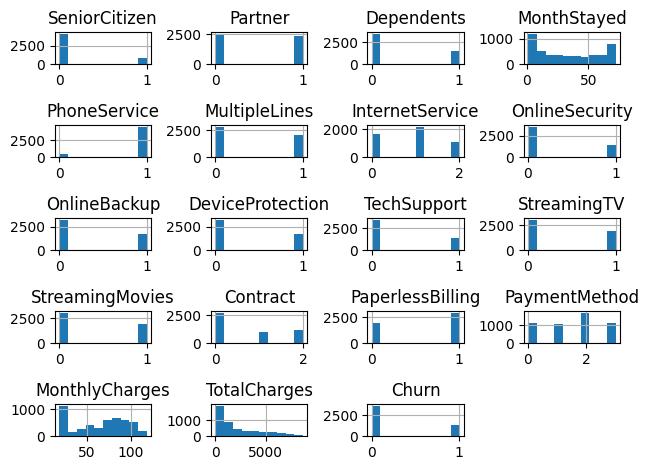

In [69]:
tr.hist()
plt.tight_layout()

Very few outliers but widely different scales

## Scaling so the models can do better

In [70]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

tr[['Contract', 'PaymentMethod']] = min_max.fit_transform(tr[['Contract', 'PaymentMethod']])

In [71]:
tr['Contract'].value_counts()

Contract
0.0    2704
1.0    1205
0.5    1013
Name: count, dtype: int64

In [72]:
tr['PaymentMethod'].value_counts()

PaymentMethod
0.666667    1665
1.000000    1101
0.000000    1084
0.333333    1072
Name: count, dtype: int64

In [73]:
tr

,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4499,0,0.0,1.0,12,1.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,78.30,909.25,1.0
1933,0,0.0,0.0,20,1.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.000000,19.70,415.90,0.0
4668,0,0.0,1.0,2,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.333333,61.20,125.95,0.0
5681,1,1.0,0.0,34,1.0,0.0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,0.000000,64.20,2106.30,0.0
3610,0,0.0,0.0,12,1.0,1.0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,100.15,1164.30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,0,0.0,1.0,23,1.0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,54.15,1312.45,0.0
3451,1,1.0,0.0,65,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.000000,70.95,4555.20,0.0
4135,0,1.0,1.0,36,1.0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,92.90,3379.25,0.0
4249,0,1.0,1.0,10,1.0,0.0,0,0.0,1.0,1.0,0.0,0.0,1.0,0.5,1.0,1.000000,65.90,660.05,0.0


In [ ]:
# Using proper parameters for each model
models = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100], # how many trees
            'max_features':['sqrt', 'log2', None] # number of features sulected when bootstrapping
        }
    },
     'SVM':{
        'model':svm.SVC(),
        'params':{
            'kernel':['rbf', 'poly'], # What type of line it is
            'gamma':[0.5, 0.7] # how rough or smooth it is
        }
    }, 
     'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors': [10]
            
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='binary:logistic'),
        'params': {
            'learning_rate': [0.03, 0.1, 0.3],
            'n_estimators': [50, 75]
        }
    }
}

In [ ]:
# This took to long to run so I gave up
scores = []
for model, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'])
    clf.fit(tr.drop('Churn', axis=1), tr['Churn'])

    scores.append({
        'model':clf.best_estimator_,
        'param':clf.best_params_,
        'score':clf.best_score_
                   })

In [ ]:
scores